In [2]:
# importing everything we need for the complete task
import numpy
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

In [3]:
env = gym.make('CliffWalking-v0')
state, _ = env.reset()

In [4]:
# Initialize parameters
num_states = env.observation_space.n  # Total number of states
num_actions = env.action_space.n  # Total number of actions
q_table = np.zeros((num_states, num_actions))  # Q-table initialization
q_cummulated_rewards = []
sarsa_cummulated_rewards = []
sarsa_q_table = np.zeros((num_states,num_actions))

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
#epsilon = 0.4  # Epsilon for exploration (epsilon-greedy)
num_episodes = 500  # Number of episodes to train

## a)
**Algorithm 1**: The implementation of the q-learning algorithm

In [5]:
# The Q-Learning algorithm
def qlearn(num_episodes, epsilon = 0.4):
    for episode in range(num_episodes):
        state, _ = env.reset()  # Reset environment at the start of each episode
        done = False
        cummulated_reward = 0

        while not done:
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # Explore: random action
            else:
                action = np.argmax(q_table[state, :])  # Exploit: best known action

            # Take the action, observe the next state and reward
            next_state, reward, terminated, truncated, _ = env.step(action)

            # Q-learning update rule
            best_next_action = np.argmax(q_table[next_state, :])  # max_a' Q(s', a')
            td_target = reward + gamma * q_table[next_state, best_next_action]
            td_delta = td_target - q_table[state, action]
            q_table[state, action] += alpha * td_delta
            
            # add the current reward to the cummulated rewards
            cummulated_reward = cummulated_reward + reward

            # check if it walked of the cliff, or reached goal position
            # add the cummulated reward into the list if the episode is over
            done = terminated or truncated
            if done:
                q_cummulated_rewards.append(cummulated_reward)
            
            # Transition to the next state

            state = next_state

**Algorithm 2**: The implementation of the q-learning algorithmThe implementation of the SARSA algorithm

In [6]:
# SARSA Algorithm
def sarsa(num_episodes, epsilon=0.4):
    for episode in range(num_episodes):
        state, _ = env.reset()
        # Choose the first action using epsilon-greedy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(sarsa_q_table[state, :])  # Exploit

        cummulated_reward = 0
        done = False

        while not done:
            # Take action and observe the next state and reward
            next_state, reward, terminated, truncated, _ = env.step(action)

            # Choose the next action using epsilon-greedy
            if np.random.rand() < epsilon:
                next_action = env.action_space.sample()  # Explore
            else:
                next_action = np.argmax(sarsa_q_table[next_state, :])  # Exploit

            # Update Q-value
            sarsa_q_table[state, action] += alpha * (
                reward + gamma * sarsa_q_table[next_state, next_action] - sarsa_q_table[state, action]
            )

            # Add the current reward to the cumulative reward for the episode
            cummulated_reward += reward

            # Update state and action for the next loop iteration
            state, action = next_state, next_action

            # Check if the episode is done
            done = terminated or truncated

        # Record cumulative reward for the episode
        sarsa_cummulated_rewards.append(cummulated_reward)


In [7]:
# Extract the best policy from the Q-table
def extract_policy(q_table, env):
    policy = np.zeros(env.observation_space.n, dtype=int)
    for state in range(env.observation_space.n):
        policy[state] = np.argmax(q_table[state, :])  # Best action for each state
    return policy

In [8]:
def plot_policy_as_text(policy, env, title="Policy Visualization (Text Arrows)"):
    # Infer grid dimensions (specific to CliffWalking-v0)
    grid_shape = (4, 12)  # 4 rows, 12 columns

    # Action-to-arrow mapping
    actions_to_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}

    # Convert the policy into a grid of arrows
    policy_grid = np.full(grid_shape, " ")  # Start with empty grid
    for state, action in enumerate(policy):
        row, col = divmod(state, grid_shape[1])  # Convert state to grid row and column
        policy_grid[row, col] = actions_to_arrows[action]  # Set the action arrow

    # Mark special positions in the last row
    policy_grid[3, 0] = "S"  # Start
    for col in range(1, grid_shape[1] - 1):
        policy_grid[3, col] = "X"  # Cliff
    policy_grid[3, grid_shape[1] - 1] = "G"  # Goal

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlim(-0.5, grid_shape[1] - 0.5)
    ax.set_ylim(-0.5, grid_shape[0] - 0.5)
    ax.set_xticks(np.arange(-0.5, grid_shape[1], 1), minor=False)
    ax.set_yticks(np.arange(-0.5, grid_shape[0], 1), minor=False)
    ax.grid(which="major", color="black", linestyle="-", linewidth=1)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Add the arrows as text
    for row in range(grid_shape[0]):
        for col in range(grid_shape[1]):
            ax.text(col, grid_shape[0] - row - 1, policy_grid[row, col], 
                    ha="center", va="center", fontsize=16, 
                    color="blue" if policy_grid[row, col] not in {"S", "X", "G"} else "red")

    # Set title and show plot
    plt.title(title)
    plt.show()


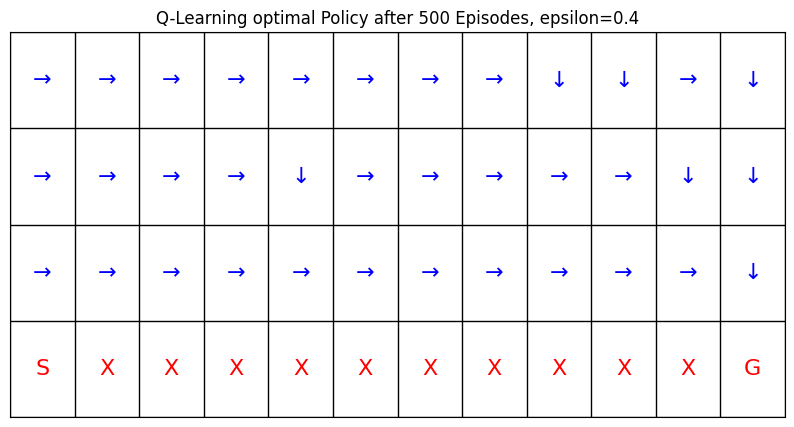

In [9]:
q_cummulated_rewards = []
q_table = np.zeros((num_states, num_actions))
qlearn(500)
# Example usage after running Q-learning:
policy = extract_policy(q_table, env)  # Extract the policy
plot_policy_as_text(policy, env, title="Q-Learning optimal Policy after 500 Episodes, epsilon=0.4")

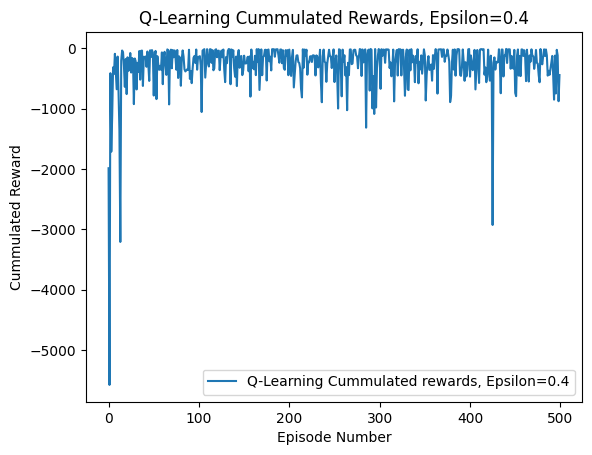

In [10]:
plt.plot(q_cummulated_rewards, linestyle='-', label="Q-Learning Cummulated rewards, Epsilon=0.4")
plt.title("Q-Learning Cummulated Rewards, Epsilon=0.4")
plt.xlabel("Episode Number")
plt.ylabel("Cummulated Reward")
plt.legend()
plt.show()

In [11]:
sarsa_cummulated_rewards = []
sarsa_q_table = np.zeros((num_states, num_actions))
sarsa(500)

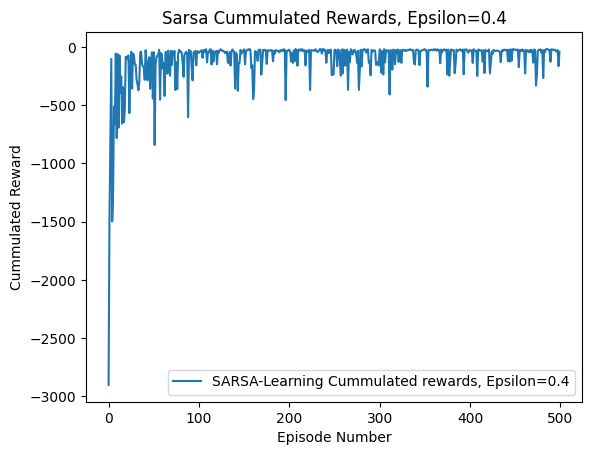

In [12]:
plt.plot(sarsa_cummulated_rewards, linestyle='-', label="SARSA-Learning Cummulated rewards, Epsilon=0.4")
plt.title("Sarsa Cummulated Rewards, Epsilon=0.4")
plt.xlabel("Episode Number")
plt.ylabel("Cummulated Reward")
plt.legend()
plt.show()

## b) 
Use your implementations of SARSA and Q-learning from the previous task to run simulations with different exploration parameters (ϵ ∈ [0.8, 0.5, 0.2, 0.05, 0])


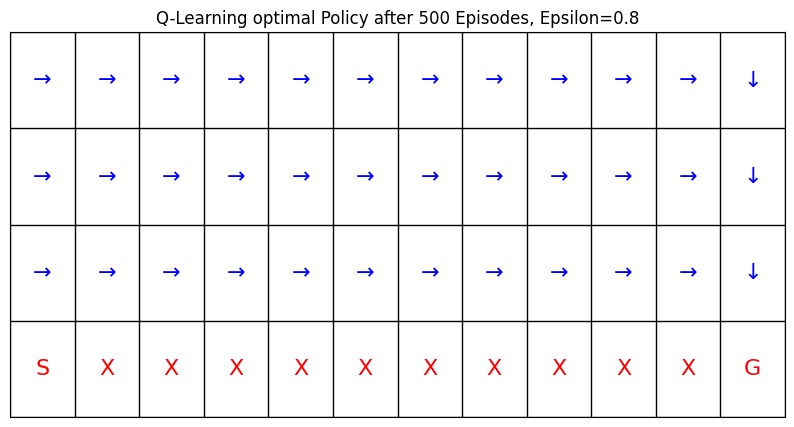

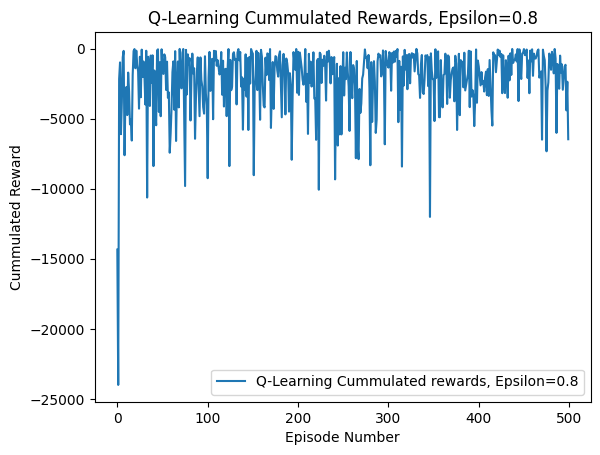

In [13]:
q_cummulated_rewards = []
q_table = np.zeros((num_states, num_actions))
qlearn(500, epsilon=0.8)
# Example usage after running Q-learning:
policy = extract_policy(q_table, env)  # Extract the policy
plot_policy_as_text(policy, env, title="Q-Learning optimal Policy after 500 Episodes, Epsilon=0.8")
plt.plot(q_cummulated_rewards, linestyle='-', label="Q-Learning Cummulated rewards, Epsilon=0.8")
plt.title("Q-Learning Cummulated Rewards, Epsilon=0.8")
plt.xlabel("Episode Number")
plt.ylabel("Cummulated Reward")
plt.legend()
plt.show()

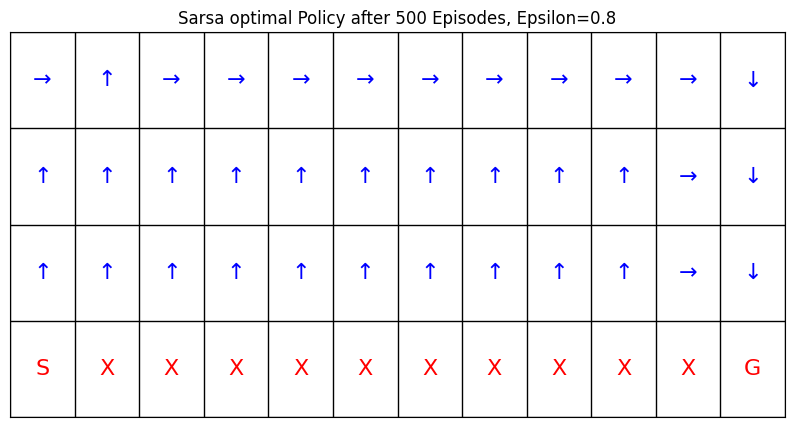

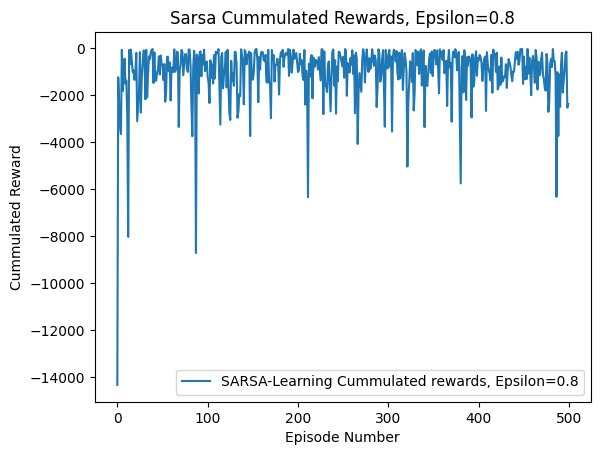

In [25]:
sarsa_cummulated_rewards = []
sarsa_q_table = np.zeros((num_states, num_actions))
sarsa(500, epsilon=0.8)
# Visualize the policy
policy = extract_policy(sarsa_q_table, env)  # Extract the policy
plot_policy_as_text(policy, env, title="Sarsa optimal Policy after 500 Episodes, Epsilon=0.8")
plt.plot(sarsa_cummulated_rewards, linestyle='-', label="SARSA-Learning Cummulated rewards, Epsilon=0.8")
plt.title("Sarsa Cummulated Rewards, Epsilon=0.8")
plt.xlabel("Episode Number")
plt.ylabel("Cummulated Reward")
plt.legend()
plt.show()

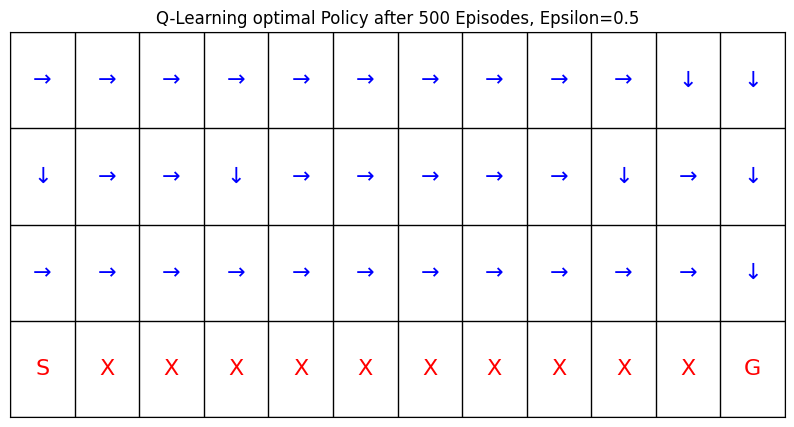

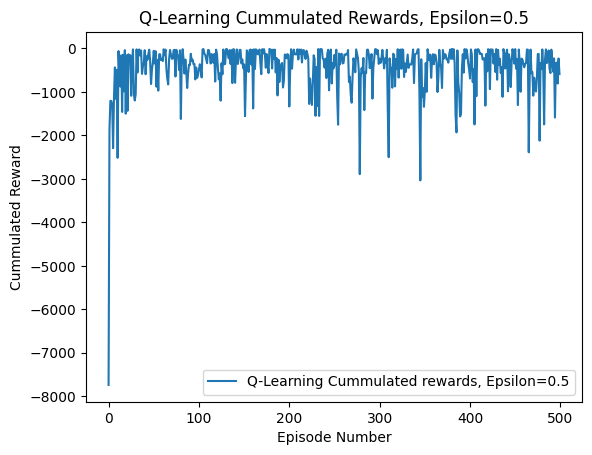

In [15]:
q_cummulated_rewards = []
q_table = np.zeros((num_states, num_actions))
qlearn(500, epsilon=0.5)
# Example usage after running Q-learning:
policy = extract_policy(q_table, env)  # Extract the policy
plot_policy_as_text(policy, env, title="Q-Learning optimal Policy after 500 Episodes, Epsilon=0.5")
plt.plot(q_cummulated_rewards, linestyle='-', label="Q-Learning Cummulated rewards, Epsilon=0.5")
plt.title("Q-Learning Cummulated Rewards, Epsilon=0.5")
plt.xlabel("Episode Number")
plt.ylabel("Cummulated Reward")
plt.legend()
plt.show()

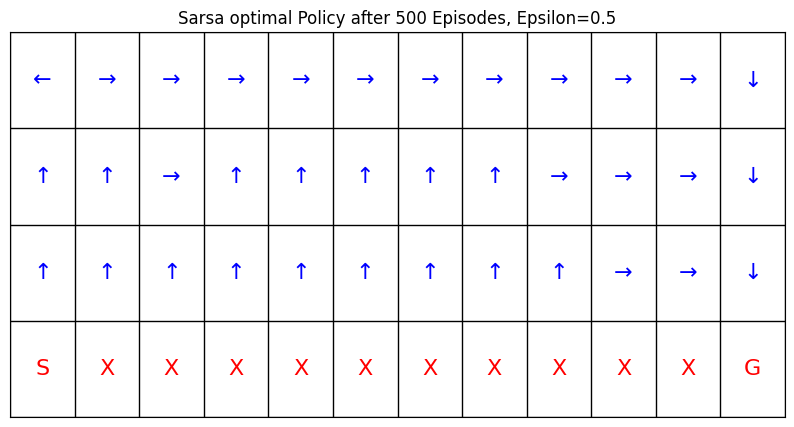

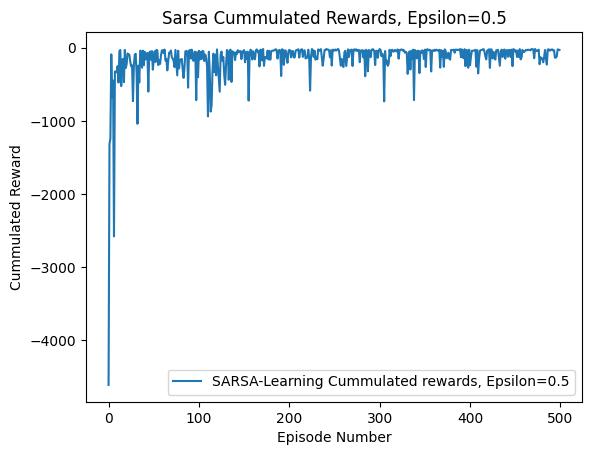

In [26]:
sarsa_cummulated_rewards = []
sarsa_q_table = np.zeros((num_states, num_actions))
sarsa(500, epsilon=0.5)
# Visualize the policy
policy = extract_policy(sarsa_q_table, env)  # Extract the policy
plot_policy_as_text(policy, env, title="Sarsa optimal Policy after 500 Episodes, Epsilon=0.5")
plt.plot(sarsa_cummulated_rewards, linestyle='-', label="SARSA-Learning Cummulated rewards, Epsilon=0.5")
plt.title("Sarsa Cummulated Rewards, Epsilon=0.5")
plt.xlabel("Episode Number")
plt.ylabel("Cummulated Reward")
plt.legend()
plt.show()

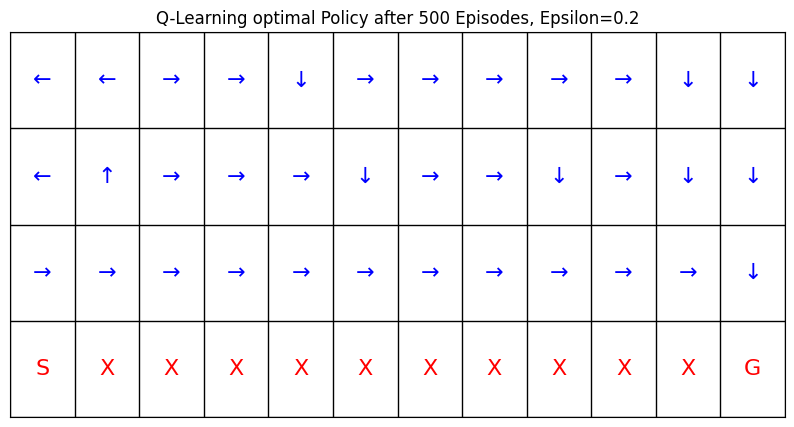

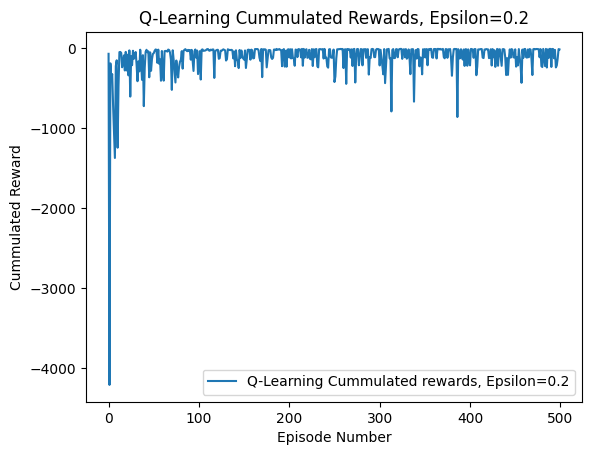

In [17]:
q_cummulated_rewards = []
q_table = np.zeros((num_states, num_actions))
qlearn(500, epsilon=0.2)
# Example usage after running Q-learning:
policy = extract_policy(q_table, env)  # Extract the policy
plot_policy_as_text(policy, env, title="Q-Learning optimal Policy after 500 Episodes, Epsilon=0.2")
plt.plot(q_cummulated_rewards, linestyle='-', label="Q-Learning Cummulated rewards, Epsilon=0.2")
plt.title("Q-Learning Cummulated Rewards, Epsilon=0.2")
plt.xlabel("Episode Number")
plt.ylabel("Cummulated Reward")
plt.legend()
plt.show()

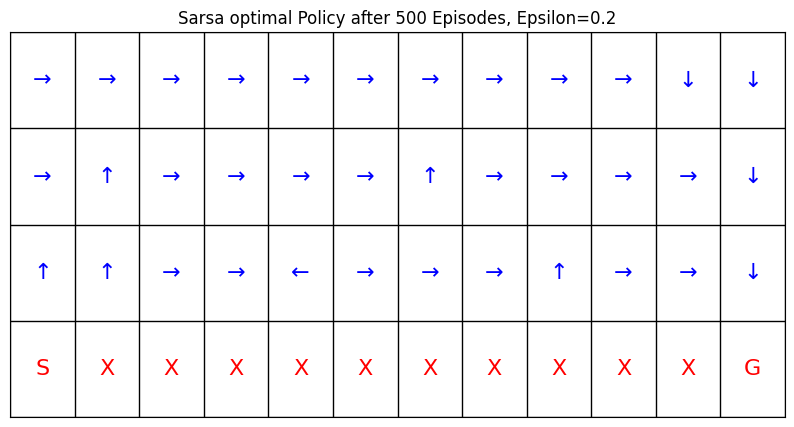

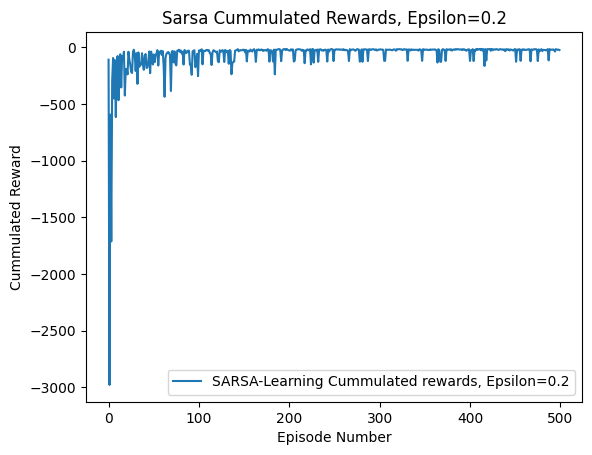

In [27]:
sarsa_cummulated_rewards = []
sarsa_q_table = np.zeros((num_states, num_actions))
sarsa(500, epsilon=0.2)
# Visualize the policy
policy = extract_policy(sarsa_q_table, env)  # Extract the policy
plot_policy_as_text(policy, env, title="Sarsa optimal Policy after 500 Episodes, Epsilon=0.2")
plt.plot(sarsa_cummulated_rewards, linestyle='-', label="SARSA-Learning Cummulated rewards, Epsilon=0.2")
plt.title("Sarsa Cummulated Rewards, Epsilon=0.2")
plt.xlabel("Episode Number")
plt.ylabel("Cummulated Reward")
plt.legend()
plt.show()

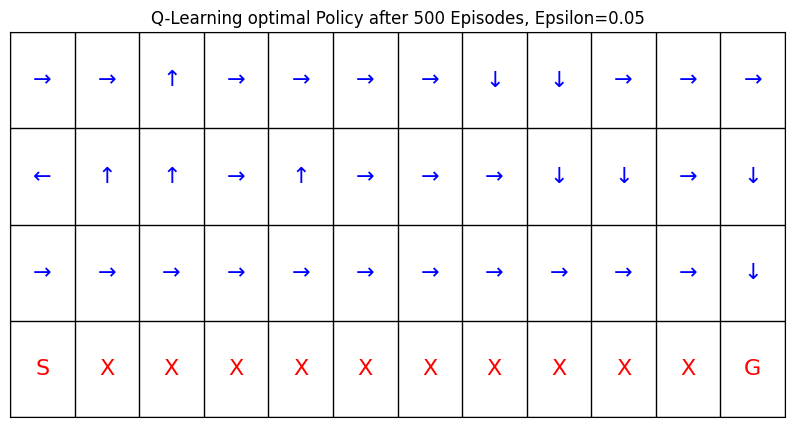

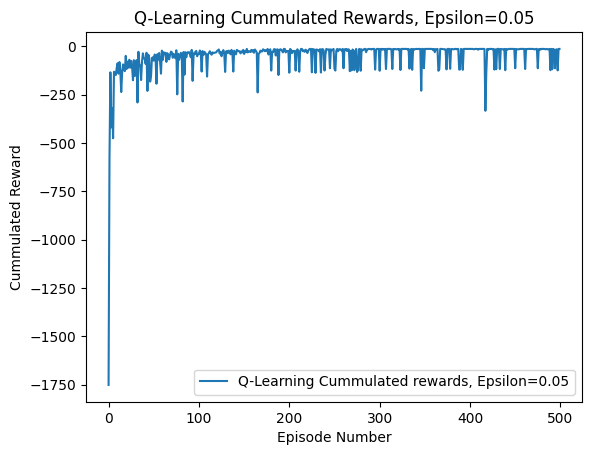

In [19]:
q_cummulated_rewards = []
q_table = np.zeros((num_states, num_actions))
qlearn(500, epsilon=0.05)
# Example usage after running Q-learning:
policy = extract_policy(q_table, env)  # Extract the policy
plot_policy_as_text(policy, env, title="Q-Learning optimal Policy after 500 Episodes, Epsilon=0.05")
plt.plot(q_cummulated_rewards, linestyle='-', label="Q-Learning Cummulated rewards, Epsilon=0.05")
plt.title("Q-Learning Cummulated Rewards, Epsilon=0.05")
plt.xlabel("Episode Number")
plt.ylabel("Cummulated Reward")
plt.legend()
plt.show()

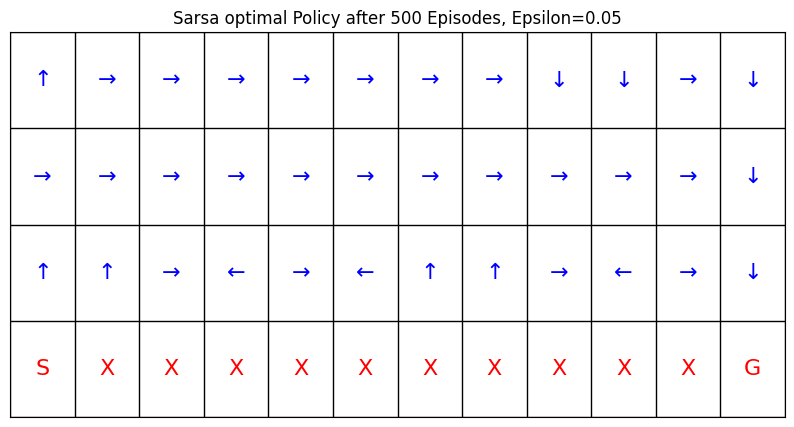

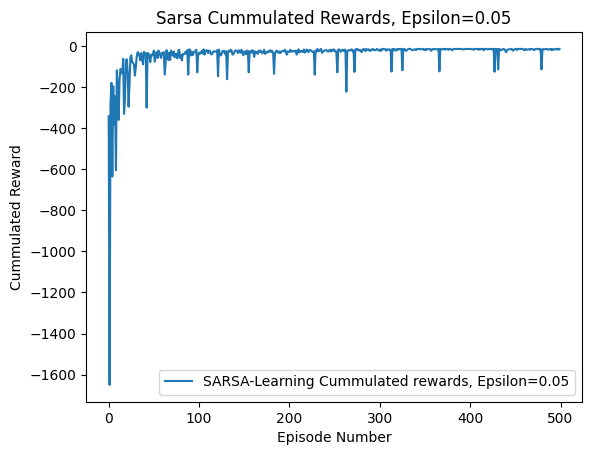

In [28]:
sarsa_cummulated_rewards = []
sarsa_q_table = np.zeros((num_states, num_actions))
sarsa(500, epsilon=0.05)
# Visualize the policy
policy = extract_policy(sarsa_q_table, env)  # Extract the policy
plot_policy_as_text(policy, env, title="Sarsa optimal Policy after 500 Episodes, Epsilon=0.05")
plt.plot(sarsa_cummulated_rewards, linestyle='-', label="SARSA-Learning Cummulated rewards, Epsilon=0.05")
plt.title("Sarsa Cummulated Rewards, Epsilon=0.05")
plt.xlabel("Episode Number")
plt.ylabel("Cummulated Reward")
plt.legend()
plt.show()

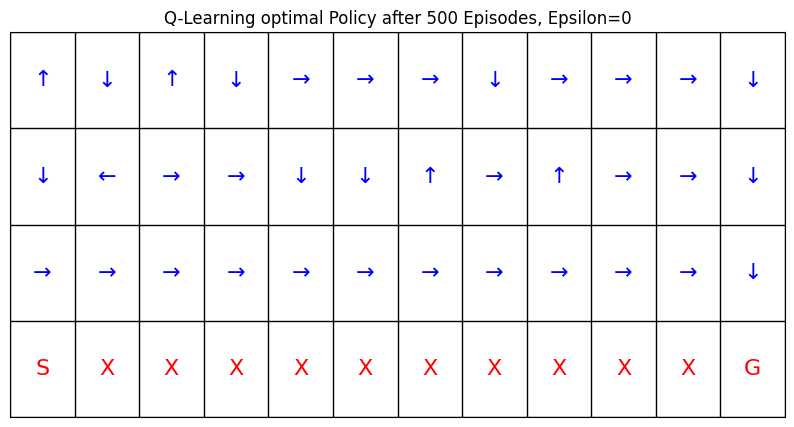

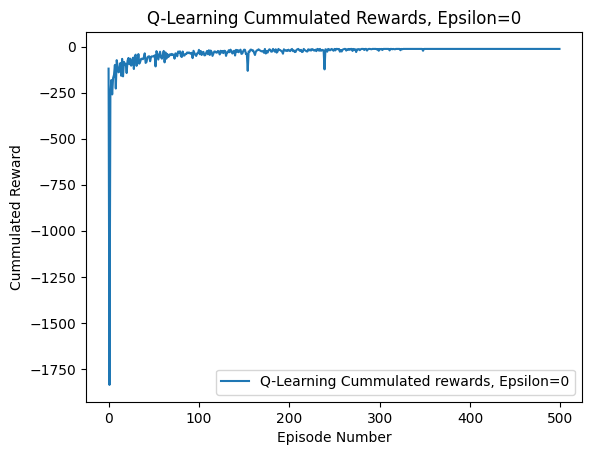

In [21]:
q_cummulated_rewards = []
q_table = np.zeros((num_states, num_actions))
qlearn(500, epsilon=0)
# Example usage after running Q-learning:
policy = extract_policy(q_table, env)  # Extract the policy
plot_policy_as_text(policy, env, title="Q-Learning optimal Policy after 500 Episodes, Epsilon=0")
plt.plot(q_cummulated_rewards, linestyle='-', label="Q-Learning Cummulated rewards, Epsilon=0")
plt.title("Q-Learning Cummulated Rewards, Epsilon=0")
plt.xlabel("Episode Number")
plt.ylabel("Cummulated Reward")
plt.legend()
plt.show()

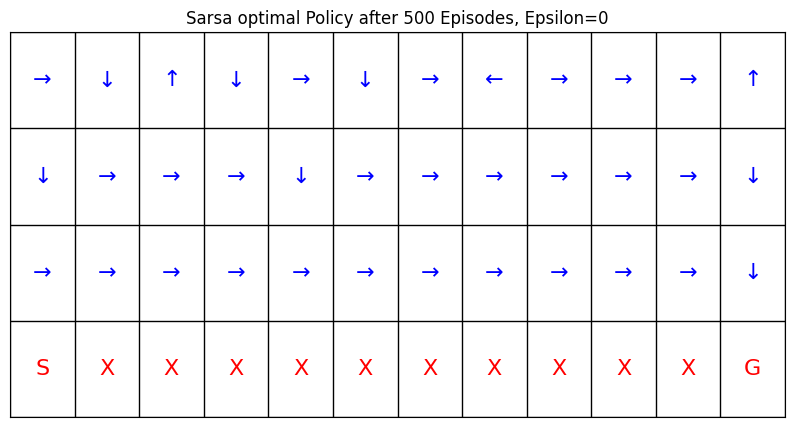

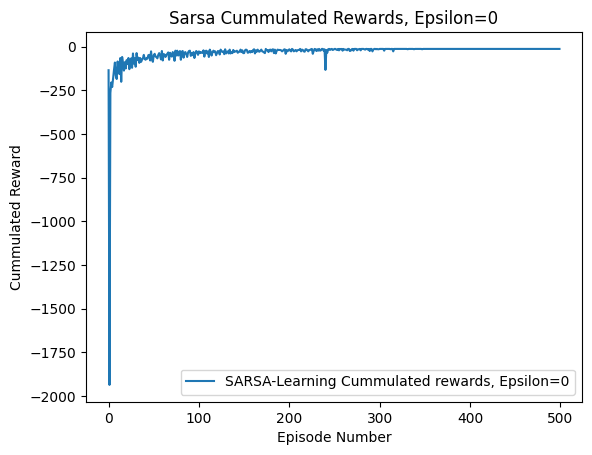

In [29]:
sarsa_cummulated_rewards = []
sarsa_q_table = np.zeros((num_states, num_actions))
sarsa(500, epsilon=0)
# Visualize the policy
policy = extract_policy(sarsa_q_table, env)  # Extract the policy
plot_policy_as_text(policy, env, title="Sarsa optimal Policy after 500 Episodes, Epsilon=0")
plt.plot(sarsa_cummulated_rewards, linestyle='-', label="SARSA-Learning Cummulated rewards, Epsilon=0")
plt.title("Sarsa Cummulated Rewards, Epsilon=0")
plt.xlabel("Episode Number")
plt.ylabel("Cummulated Reward")
plt.legend()
plt.show()